In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [38]:
def read_excel_sheets(xls_path):
    """Read all sheets of an Excel workbook and return a single DataFrame"""
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = pd.DataFrame()
    columns = None
    for idx, name in enumerate(xl.sheet_names):
        print(f'Reading sheet #{idx}: {name}')
        sheet = xl.parse(name)
        if idx == 0:
            # Save column names from the first sheet to match for append
            columns = sheet.columns
        sheet.columns = columns
        # Assume index of existing data frame when appended
        df = df.append(sheet, ignore_index=True)
    return df

In [39]:
answers_df = read_excel_sheets("/content/VQA_samples_answers.xlsx")
print(answers_df.shape)

Loading /content/VQA_samples_answers.xlsx into pandas
Reading sheet #0: Form Responses 80
Reading sheet #1: Form Responses 79
Reading sheet #2: Form Responses 78
Reading sheet #3: Form Responses 77
Reading sheet #4: Form Responses 76
Reading sheet #5: Form Responses 75
Reading sheet #6: Form Responses 74
Reading sheet #7: Form Responses 73
Reading sheet #8: Form Responses 72
Reading sheet #9: Form Responses 71
Reading sheet #10: Form Responses 70
Reading sheet #11: Form Responses 69
Reading sheet #12: Form Responses 68
Reading sheet #13: Form Responses 67
Reading sheet #14: Form Responses 66
Reading sheet #15: Form Responses 65
Reading sheet #16: Form Responses 64
Reading sheet #17: Form Responses 63
Reading sheet #18: Form Responses 62
Reading sheet #19: Form Responses 61
Reading sheet #20: Form Responses 60
Reading sheet #21: Form Responses 59
Reading sheet #22: Form Responses 58
Reading sheet #23: Form Responses 57
Reading sheet #24: Form Responses 56
Reading sheet #25: Form Respons

In [40]:
answers_df["Email Address"]

0                aggeliki.lazaridou@gmail.com
1                           altche@google.com
2                        corentint@google.com
3                          jbgrill@google.com
4                           etar@deepmind.com
5                           bartdv@google.com
6                        zhouhy4869@gmail.com
7                      muteshev0102@gmail.com
8                     fangwenjia711@gmail.com
9     victor.asso-roudieres@polytechnique.edu
10      lorenzo.tonelli.x19@polytechnique.edu
11                Ayoub.TABAAI@emines.um6p.ma
12                    florian.strub@gmail.com
13               aymeric.dieuleveut@gmail.com
14                   margauxzaffran@gmail.com
15                   kamelia.daudel@gmail.com
16               charles.ollion@heuritech.com
17                    chloemonneron@gmail.com
18                       laurage_@hotmail.com
19              louison.carroue@sciencespo.fr
20                   charles.ollion@gmail.com
21                     abdellah852

In [41]:
def get_quality_section(answers_df):
  return answers_df.iloc[:,1:11]

In [42]:
def get_relevancy_section(answers_df):
  return answers_df.iloc[:,31:41]

In [43]:
def get_diversity_section(answers_df):
  div_range = range(11,31,2)
  corr_range = range(12,31,2) 
  corr_section = answers_df.iloc[:, corr_range]
  corr_section = corr_section.fillna(value="")
  return answers_df.iloc[:, div_range], corr_section

In [44]:
quality_section = get_quality_section(answers_df)
relevancy_section = get_relevancy_section(answers_df)
diversity_section, correct_samples = get_diversity_section(answers_df)

In [45]:
quality_section

,Pair #1,Pair #2,Pair #3,Pair #4,Pair #5,Pair #6,Pair #7,Pair #8,Pair #9,Pair #10
0,Q2: What color is the person's shirt?,Q1: What utensil is in the bowl?,Q1: What color are the leaves?,Q1: How many jets are there?,Q1: What kind of roof is on the clock?,Q1: How many lamps are there?,Q2: How many picture rub do you see?,Q2: What was that?,Q1: Which game does she go?,Q2: How many people are in the picture?
1,Q2: What color is the door?,Q2: How many pieces are here?,Q2: How many different objects have been used?,Q1: What is the red object?,Q1: Is the girl a girl or girl?,Q2: How many different species have we encount...,Q1: What animal is shown on the ground?,Q2: How many different species have we encount...,Q2: What color is the grass?,Q2: How many benches are there?
2,Q2: What kind of dog is this?,Q1: What is the animal on?,Q1: What game is being played?,Q1: Where was this picture taken?,Q2: Which game does she go?,Q1: What is this person standing on?,Q1: How many people are in the room?,Q1: How many pieces are here?,Q2: What type of apple is up on this plant?,Q2: How many engines does this place have?
3,Q2: What is in the bird's Garage?,Q1: What utensil is in the bowl?,Q2: What color of clothing did he get?,Q2: How many elephants are there?,Q1: What is on the girl's neck?,Q2: What was that for?,Q1: What color is the man's shirt?,Q1: Which color is this fire?,Q1: Which item has more aggressive up their legs?,Q1: What was that for?
4,Q2: What color is the grass?,Q1: What is the person doing?,Q2: What was that for?,Q1: What is on the ground?,Q1: What color is the light?,Q1: What color is the light?,Q1: What animal is shown on the ground?,Q2: What was that?,Q2: What number is the teddy pipe overlap?,Q2: How many chairs are at the home?
5,Q1: What is on the man's shirt?,Q1: What color is the man's shirt playing left?,Q2: How many different objects have been used ...,Q1: What is he holding?,Q2: How many pieces are here?,Q2: What was that?,Q1: What type of room is this?,Q2: What was that girl doing?,Q2: What color is the man's bat?,Q1: How many different shapes have been seen h...
6,Q1: What type of shirt is he wearing?,Q2: Where did they at bat?,Q2: How many different ways would we take them...,Q1: What color is the cat?,Q1: What color is the horse?,Q2: How many different species have we encount...,Q1: What is the girl doing?,Q2: What was that girl doing?,Q1: Where did they at bat?,Q1: How many different ways should one take ou...
7,Q2: What color is her shirt?,Q1: Is the girl a girl or girl?,Q1: What is he holding?,Q1: What is the brand doing?,Q1: What color is the cat?,Q2: What was that for?,Q1: Is the girl a girl or girl?,Q2: What was that for?,Q2: What color is the toilet seat?,Q2: How many people are in the picture?
8,Q2: What type of room is this?,Q2: Which item doesn't turn?,Q1: What color is in the man's shirt?,Q2: What color is the grass?,Q2: How many pieces are here?,Q1: How many people are in the room?,Q2: What color items is this guy holding?,Q2: What was there?,Q2: How many wheels in the picture?,Q1: How many different ways should one go when...
9,Q2: What is this person standing on?,Q1: What color are the leaves?,Q2: What was that for?,Q2: What color is the toilet seat?,Q1: How many trains are shown?,Q2: How much food has it given him?,Q1: What is the girl doing?,Q1: How many windows are here?,Q2: What brand is the object?,Q1: What was that fish wearing?


In [46]:
def build_pairs_correspondance():
  pairs_mapp = np.zeros((10,2))
  index = 0
  for i in range(4):
    j = i+1
    while j<5:
      pairs_mapp[index,0] = i
      pairs_mapp[index,1] = j
      index += 1
      j+= 1
  return pairs_mapp.astype(int)

In [47]:
pairs_mapping = build_pairs_correspondance()
pairs_mapping

array([[0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 3],
       [2, 4],
       [3, 4]])

In [48]:
def build_models_pairs_mapping(pairs_mapping):
  dict_models = dict(zip(list(range(5)), ["pretrain", "pretrain+RL", "TruFLL(task-LM)", "TruFLL(Ext-LM)", "scratch+KL-task"]))
  models_mapp = []
  for index in range(10):
    models_mapp.append([dict_models[pairs_mapping[index, 0]], dict_models[pairs_mapping[index, 1]]])
  return models_mapp

In [49]:
pairs_mapping = build_pairs_correspondance()
models_mapping = build_models_pairs_mapping(pairs_mapping)

In [50]:
def confusion_matrix(section, pairs_mapping):
  confusion_matrix = np.zeros(shape=(5,5,2))
  for row in range(len(section)):
      answer = section.iloc[row]
      for index, item in enumerate(answer):
        i = pairs_mapping[index, 0]
        j = pairs_mapping[index, 1]
        if "Q1:" in item:
          confusion_matrix[i,j,0] = confusion_matrix[i,j,0] + 1
        elif "Q2:" in item:
          confusion_matrix[i,j,1] = confusion_matrix[i,j,1] + 1
  return confusion_matrix, confusion_matrix / (row + 1)

In [51]:
def diversity_confusion_matrix(div_section, corr_section, pairs_mapping, filter_uncorrect_samples=True):
  confusion_matrix = np.zeros(shape=(5,5,2))
  counts = np.zeros(shape=(5,5))
  for row in range(len(diversity_section)):
      answer = div_section.iloc[row]
      corr_sample = corr_section.iloc[row]
      for index, (item, is_corr) in enumerate(zip(answer, corr_sample)):
        i = pairs_mapping[index, 0]
        j = pairs_mapping[index, 1]
        if "Q1:" in item:
          if filter_uncorrect_samples and "Q1:" not in is_corr:
            confusion_matrix[i,j,0] = confusion_matrix[i,j,0] + 1
            counts[i, j] += 1
          elif not filter_uncorrect_samples:
            confusion_matrix[i,j,0] = confusion_matrix[i,j,0] + 1
            counts[i, j] += 1
        elif "Q2:" in item:
          if filter_uncorrect_samples and "Q2:" not in is_corr:
            confusion_matrix[i,j,1] = confusion_matrix[i,j,1] + 1
            counts[i, j] += 1
          elif not filter_uncorrect_samples:
            confusion_matrix[i,j,1] = confusion_matrix[i,j,1] + 1
            counts[i, j] += 1
  div_counts = counts[:,:,np.newaxis] + np.tril(np.ones(shape=(5,5,1)))
  cf_percent = confusion_matrix / (row + 1)
  return confusion_matrix, cf_percent

In [52]:
def get_uncorrect_samples(section, pairs_mapping, models_mapping):
  confusion_matrix = np.zeros(shape=(5,5,2))
  model_counts = dict(zip(["pretrain", "pretrain+RL", "TruFLL(task-LM)", "TruFLL(Ext-LM)", "scratch+KL-task"], [0]*5))
  for row in range(len(section)):
      answer = section.iloc[row]
      for index, item in enumerate(answer):
        i = pairs_mapping[index, 0]
        model_1 = models_mapping[index][0]
        j = pairs_mapping[index, 1]
        model_2 = models_mapping[index][1]
        if "Q1:" in item:
          confusion_matrix[i,j,0] = confusion_matrix[i,j,0] + 1
          model_counts[model_1] += 1
        if "Q2:" in item:
          confusion_matrix[i,j,1] = confusion_matrix[i,j,1] + 1
          model_counts[model_2] +=1
  print(row)
  model_counts_percent = dict(zip(model_counts.keys(), [c/(4*(row+1)) for c in model_counts.values()]))
  return model_counts, model_counts_percent

In [53]:
quality_cf, quality_cf_percent = confusion_matrix(quality_section, pairs_mapping)
relevancy_cf, relevancy_cf_percent = confusion_matrix(relevancy_section, pairs_mapping)
diversity_cf, diversity_cf_percent = confusion_matrix(diversity_section, pairs_mapping)
diversity_cf_filter, diversity_cf_percent_filter = diversity_confusion_matrix(diversity_section, correct_samples, pairs_mapping)

In [54]:
#diversity_cf, diversity_cf_percent = diversity_confusion_matrix(diversity_section, correct_samples, pairs_mapping)
_, model_counts = get_uncorrect_samples(correct_samples, pairs_mapping, models_mapping)

52


In [55]:
model_counts

{'TruFLL(Ext-LM)': 0.2688679245283019,
 'TruFLL(task-LM)': 0.44339622641509435,
 'pretrain': 0.29245283018867924,
 'pretrain+RL': 0.3160377358490566,
 'scratch+KL-task': 0.49056603773584906}

In [56]:
#model_counts
#model_counts_ = [0.0] + list(model_counts.values())[:-1]
#bottoms = [sum(model_counts_[:i+1]) for i in range(len(model_counts_))]
#print(bottoms)
#plt.hist(list(model_counts.values()), histtype='barstacked', label=list(model_counts.keys()))
#fig, ax = plt.subplots(figsize=(10,10))
#bars = []
#for (model, count), bottom in zip(model_counts.items(), bottoms):
  #bar_= ax.bar([0.0], [count], label=model, bottom=bottom, width=0.10)
  #bars.append(bar_)
  #ax.bar_label(bar_, label_type='center')
#ax.set_xlim(0, 1)


#for (bar, count) in zip(bars, model_counts.values()):
  # Rectangle widths are already integer-valued but are floating
  # type, so it helps to remove the trailing decimal point and 0 by
  # converting width to int type
  #width = int(bar.get_width())
  # Shift the text to the left side of the right edge
  #xloc = -5
  # White on magenta
  #clr = 'white'
  #align = 'center'
  # Center the text vertically in the bar
  #yloc = bar.get_y() + bar.get_height() / 2
  #label = ax.annotate(
            #str(count), xy=(0, yloc), xytext=(xloc, 0),
            #textcoords="offset points",
            #horizontalalignment=align, verticalalignment='center',
            #color=clr, weight='bold', clip_on=True)
#for bar in bars:
  #ax.bar_label(bar, label_type='center')
#ax.legend()
#ax.set_title('Percent of uncorrect samples per model')

In [57]:
def absolute_value(val):
    arr = np.array(list(model_counts.values()))
    a  = np.round(val*arr.sum(), 0)
    return '{:4.0f}%'.format(a)

In [58]:
def plot_uncorrect_samples(model_counts, out_path="/content/", legend=None, labels=None, normalize=True):
  fig, ax = plt.subplots(figsize=(12,10))
  if normalize:
    autopct='%1.0f%%'
  else:
    autopct=absolute_value
  wedges, texts, autotexts = ax.pie(list(model_counts.values()), autopct=autopct, labels=["pretrain [2]", "pretrain+RL [3]", "TruFLL(Task-LM) [4]", "TruFLL(Ext-LM) [1]", "scratch+KL-task [5]"],
          startangle=90, colors=['mediumseagreen', 'yellowgreen', 'coral', 'seagreen', 'indianred'], wedgeprops = {'linewidth': 0}, textprops={'weight': 'bold', 'color': 'k', 'fontsize': 24, 'alpha': 0.6})
  ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  if legend is None:
    legend_= list(model_counts.keys())
  else:
    legend_ = legend
  #ax.legend(wedges, legend_,
            #loc="upper left",
            #bbox_to_anchor=(0.8, 0.9, 0, 0),
            #fontsize=24,
            #facecolor='grey',
            #framealpha=0.4,
            #prop={"weight": "bold", "size": 16})
  fig.tight_layout()
  fig.savefig(os.path.join(out_path, "uncorrect_samples_percent.pdf"), bbox_inches="tight")
  plt.show()

In [59]:
def plot_uncorrect_samples_bar(model_counts, out_path="/content/", legend=None, labels=None):
  fig, ax = plt.subplots(figsize=(12,10))
  colors=['mediumseagreen', 'yellowgreen', 'coral', 'seagreen', 'indianred']
  for i, (label, value) in enumerate(model_counts.items()):
    ax.bar(i, value, label=label, color=colors[i])
  #rects2 = ax.bar(x + width/2, women_means, width, label='Women')
  if legend is None:
    legend_= list(model_counts.keys())
  else:
    legend_ = legend
  #ax.legend(wedges, legend_,
            #loc="upper left",
            #bbox_to_anchor=(0.8, 0.9, 0, 0),
            #fontsize=24,
            #facecolor='grey',
            #framealpha=0.4,
            #prop={"weight": "bold", "size": 16})
  ax.legend()
  fig.tight_layout()
  fig.savefig(os.path.join(out_path, "uncorrect_samples_percent_bar.pdf"), bbox_inches="tight")
  plt.show()

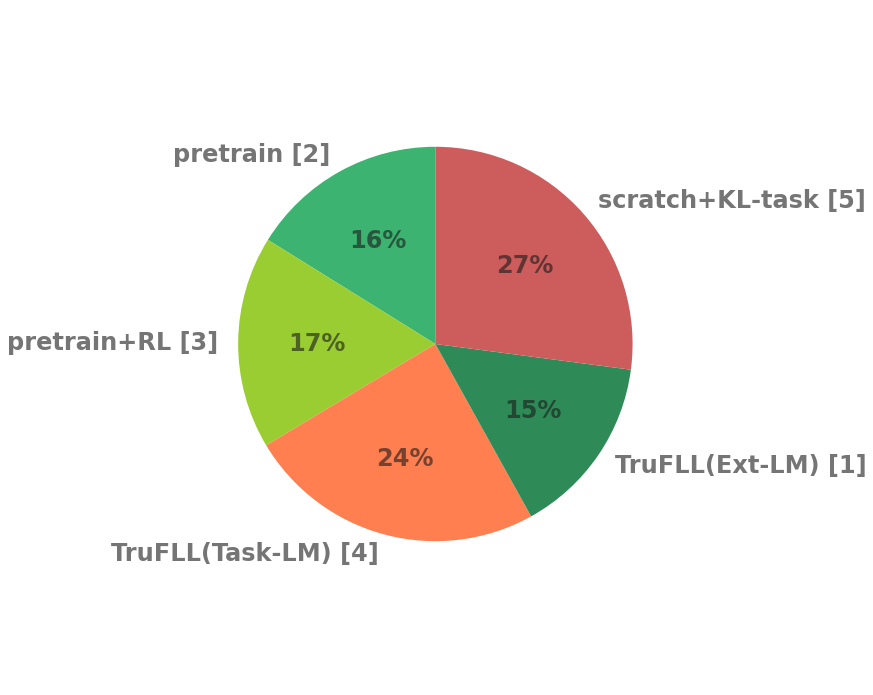

In [60]:
plot_uncorrect_samples(model_counts, legend=["pretrain [2]", "pretrain+RL [3]", "TruFLL(Task-LM) [4]", "TruFLL(Ext-LM) [1]", "scratch+KL-task [5]"])

In [61]:
#plot_uncorrect_samples_bar(model_counts)

In [62]:
def plot_confusion_matrix(confusion_matrix, lower_mat=True, cmap="RdYlGn", figsize=(10,10), show_cbar=False, fig_name="language_quality_eval.pdf", out_path="/content/"):
  models_row = ["", "pretrain+RL", "TruFLL(task-LM)", "TruFLL(Ext-LM)", "scratch+KL-task"]
  models_col = ["pretrain", "pretrain+RL", "TruFLL(task-LM)", "TruFLL(Ext-LM)", ""]
  if lower_mat:
    cf = np.transpose(confusion_matrix[:,:,0])
    df_cf = pd.DataFrame(cf, columns=models_col, index=models_row)
    df_ut = df_cf.where(np.tril(np.ones(df_cf.shape), k=-1).astype(np.bool))
  else:
    df_cf = pd.DataFrame(confusion_matrix[:,:,0], columns=models, index=models)
    df_ut = df_cf.where(np.triu(np.ones(df_cf.shape), k=1).astype(np.bool))
  #plt.figure(figsize=figsize)
  fig, ax_ = plt.subplots(figsize=(10,10))
  #ax.legend(fontsize=14)
  sns.set(font_scale=1.5)
  ax =sns.heatmap(df_ut, annot=True, cmap=cmap, annot_kws={"fontsize":20, "weight": "bold"}, fmt=".0%", cbar=show_cbar, vmin=0.2, vmax=0.8, linewidths=1.0)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, weight="bold", fontdict={"fontsize": 24})
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize": 24})
  if not lower_mat:
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
  ax.tick_params(left=False, top=False, bottom=False, right=False)
  ax.patch.set_facecolor('none')
  fig.tight_layout()
  plt.savefig(os.path.join(out_path, fig_name), bbox_inches="tight")

In [63]:
def reorder_matrix(matrix):
    matrix_ordered = matrix.copy()
    matrix_ordered[2,:2] = matrix[-1,:2]
    matrix_ordered[2,2] = 0
    matrix_ordered[2,3:] = matrix[-1,2:4]
    matrix_ordered[:2,2] = matrix[:2,-1]
    matrix_ordered[2,2] = 0
    matrix_ordered[3:,2] = matrix[2:4,-1]

    matrix_ordered[3,:2] = matrix[2, :2]
    matrix_ordered[3,2] = matrix[2, -1]
    matrix_ordered[3,3] = 0
    matrix_ordered[3,4] = matrix[2, 3]
    matrix_ordered[:2,3] = matrix[:2, 2]
    matrix_ordered[2,3] = matrix[-1, 2]
    matrix_ordered[3,3] = 0
    matrix_ordered[4,3] = matrix[3, 2]

    matrix_ordered[4,:2] = matrix[3, :2]
    matrix_ordered[4,2] = matrix[3, -1]
    matrix_ordered[4,3] = matrix[3,2]
    matrix_ordered[4,4] = 0
    matrix_ordered[:2,4] = matrix[:2, 3]
    matrix_ordered[2,4] = matrix[-1, 3]
    matrix_ordered[3,4] = matrix[2, 3]

    return matrix_ordered

In [64]:
def plot_full_confusion_matrix(confusion_matrix, cmap="RdYlGn", figsize=(12,10), show_cbar=False, vmin=0.2, vmax=0.8, fig_name="language_quality_eval.pdf", out_path="/content/", facecolor='grey', linecolor='white', weight_xlabels="bold", annot_kws={"fontsize":20,"fontweight":"bold"}, models_col=["pretrain", "pretrain+RL", "scratch+KL-task", "TruFLL(task-LM)", "TruFLL(Ext-LM)"]):
  #models_row = ["pretrain", "pretrain+RL","TruFLL(task-LM)", "TruFLL(Ext-LM)", "scratch+KL-task"]
  models_row = ["pretrain", "pretrain+RL","scratch+KL-task","TruFLL(task-LM)", "TruFLL(Ext-LM)"]
  cf = np.transpose(confusion_matrix[:,:,1]) + confusion_matrix[:,:,0]
  cf = reorder_matrix(cf)
  df_cf = pd.DataFrame(cf, columns=models_row, index=models_col)
  df_cf  = df_cf.replace(0., np.nan)
  fig, ax_ = plt.subplots(figsize=figsize)
  sns.set(font_scale=1.5)
  ax =sns.heatmap(df_cf, annot=True, cmap=cmap, annot_kws=annot_kws, fmt=".0%", cbar=show_cbar, vmin=vmin, vmax=vmax, linewidths=1.0, linecolor=linecolor)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontdict={"fontsize": 24})
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize": 24, "weight": weight_xlabels})
  sns.despine(left=True, bottom=True, top=True, right=True) 
  ax.tick_params(left=False, top=False, bottom=False, right=False)
  ax.patch.set_facecolor(facecolor)
  ax.patch.set_alpha(0.4)
  fig.tight_layout()
  plt.savefig(os.path.join(out_path, fig_name), bbox_inches="tight")

In [65]:
#annot_kws={"fontsize":20, "fontstyle":"italic","fontweight":"bold", "color":"k", "alpha":0.6, "rotation":None,"verticalalignment":"center", "backgroundcolor":"None"}
#plot_full_confusion_matrix(quality_cf_percent, weight_xlabels="bold", models_col=["2. pretrain", "1. pretrain+RL", "5. TruFLL(Task-LM)", "3. TruFLL(Ext-LM)", "4. scratch+KL-task"])

In [66]:
#annot_kws={"fontsize":20, "fontstyle":"italic","fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
#plot_full_confusion_matrix(quality_cf_percent, weight_xlabels="bold", annot_kws=annot_kws, models_col=["2. pretrain", "1. pretrain+RL", "5. TruFLL(Task-LM)", "3. TruFLL(Ext-LM)", "4. scratch+KL-task"])

In [67]:
#annot_kws={"fontsize":20,"fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
#plot_full_confusion_matrix(quality_cf_percent, weight_xlabels="bold", annot_kws=annot_kws, models_col=["2. pretrain", "1. pretrain+RL", "4. scratch+KL-task", "5. TruFLL(Task-LM)", "3. TruFLL(Ext-LM)"], linecolor="white", facecolor='grey')

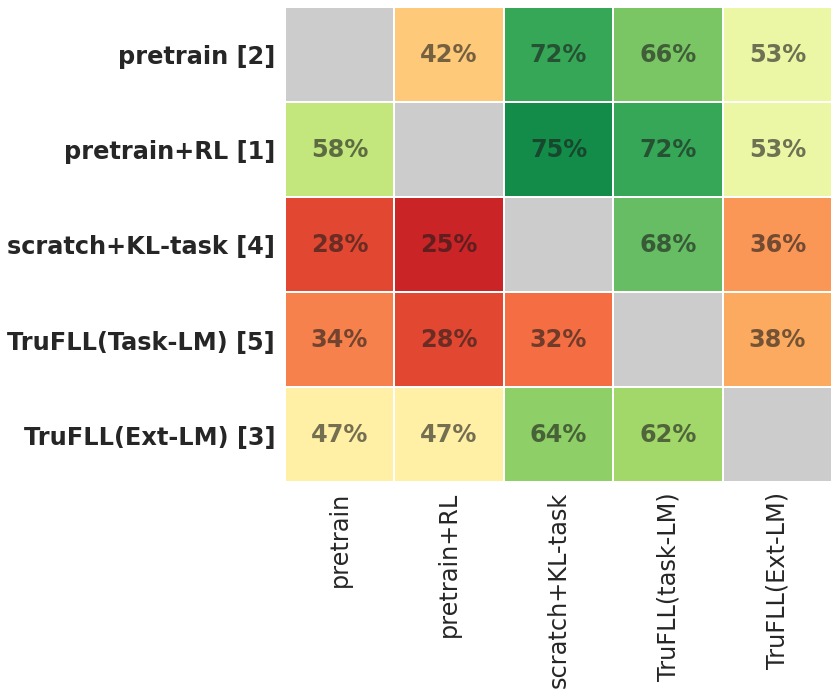

In [68]:
annot_kws={"fontsize":24,"fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
plot_full_confusion_matrix(quality_cf_percent, annot_kws=annot_kws, models_col=["pretrain [2]", "pretrain+RL [1]", "scratch+KL-task [4]", "TruFLL(Task-LM) [5]", "TruFLL(Ext-LM) [3]"])

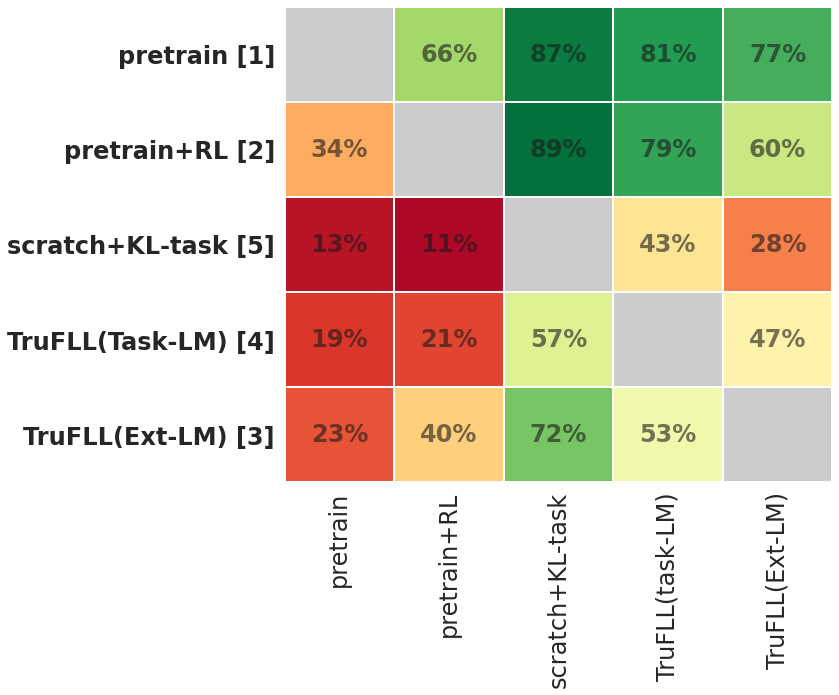

In [69]:
annot_kws={"fontsize":24,"fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
plot_full_confusion_matrix(relevancy_cf_percent, vmin=0.1, vmax=0.9, annot_kws=annot_kws, models_col=["pretrain [1]", "pretrain+RL [2]", "scratch+KL-task [5]", "TruFLL(Task-LM) [4]", "TruFLL(Ext-LM) [3]"], fig_name='question_relevance_eval.pdf')

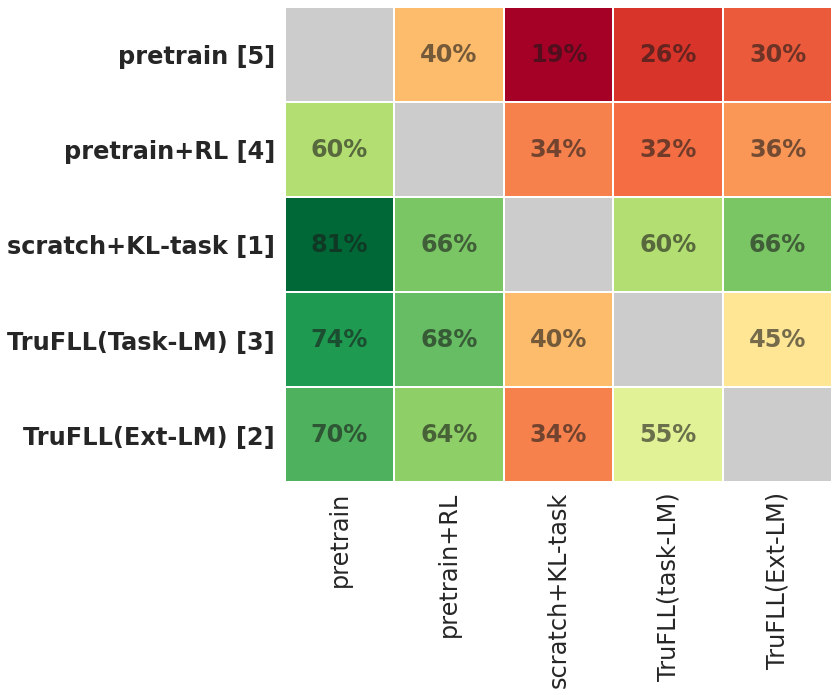

In [70]:
annot_kws={"fontsize":24,"fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
plot_full_confusion_matrix(diversity_cf_percent, annot_kws=annot_kws, models_col=["pretrain [5]", "pretrain+RL [4]", "scratch+KL-task [1]", "TruFLL(Task-LM) [3]", "TruFLL(Ext-LM) [2]"], fig_name='language_diversity_eval.pdf')

In [71]:
#plot_confusion_matrix(relevancy_cf_percent, fig_name='question_relevance_eval.pdf')
#plot_confusion_matrix(diversity_cf_percent, fig_name='language_diversity_eval.pdf')

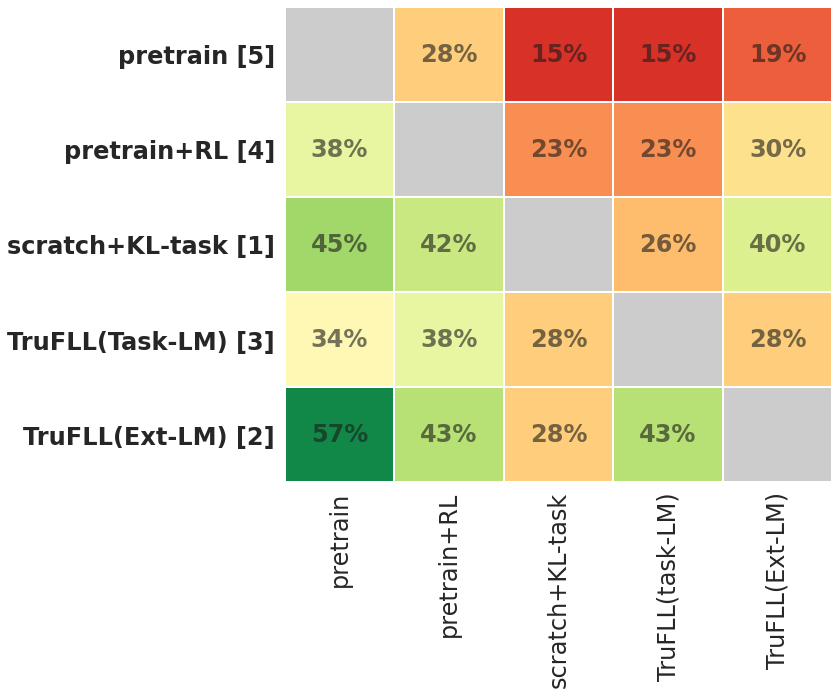

In [73]:
annot_kws={"fontsize":24,"fontweight":"bold", "color":"k", "alpha": 0.6, "verticalalignment":"center", "backgroundcolor":"None"}
plot_full_confusion_matrix(diversity_cf_percent_filter, annot_kws=annot_kws, vmax=0.6, vmin=0.1, models_col=["pretrain [5]", "pretrain+RL [4]", "scratch+KL-task [1]", "TruFLL(Task-LM) [3]", "TruFLL(Ext-LM) [2]"], fig_name='language_diversity_eval_filter.pdf')